# EDA

In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

dataset = load_dataset("samsum")

In [40]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [41]:
# first few examples
dataset['train'][:3]

{'id': ['13818513', '13728867', '13681000'],
 'dialogue': ["Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
  'Olivia: Who are you voting for in this election? \r\nOliver: Liberals as always.\r\nOlivia: Me too!!\r\nOliver: Great',
  "Tim: Hi, what's up?\r\nKim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinating\r\nTim: What did you plan on doing?\r\nKim: Oh you know, uni stuff and unfucking my room\r\nKim: Maybe tomorrow I'll move my ass and do everything\r\nKim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggies\r\nTim: For doing stuff I recommend Pomodoro technique where u use breaks for doing chores\r\nTim: It really helps\r\nKim: thanks, maybe I'll do that\r\nTim: I also like using post-its in kaban style"],
 'summary': ['Amanda baked cookies and will bring Jerry some tomorrow.',
  'Olivia and Olivier are voting for liberals in this election. ',
  'Kim may try the pomo

In [42]:

# Calculating dialogue and summary lengths
dialogue_lengths = [len(d['dialogue'].split()) for d in dataset["train"]]
summary_lengths = [len(s['summary'].split()) for s in dataset["train"]]

# Basic statistics
print("Dialogue Lengths: Avg:", np.mean(dialogue_lengths), "Min:", np.min(dialogue_lengths), "Max:", np.max(dialogue_lengths))
print("Summary Lengths: Avg:", np.mean(summary_lengths), "Min:", np.min(summary_lengths), "Max:", np.max(summary_lengths))


Dialogue Lengths: Avg: 93.7863833831116 Min: 0 Max: 803
Summary Lengths: Avg: 20.3174721694271 Min: 1 Max: 64


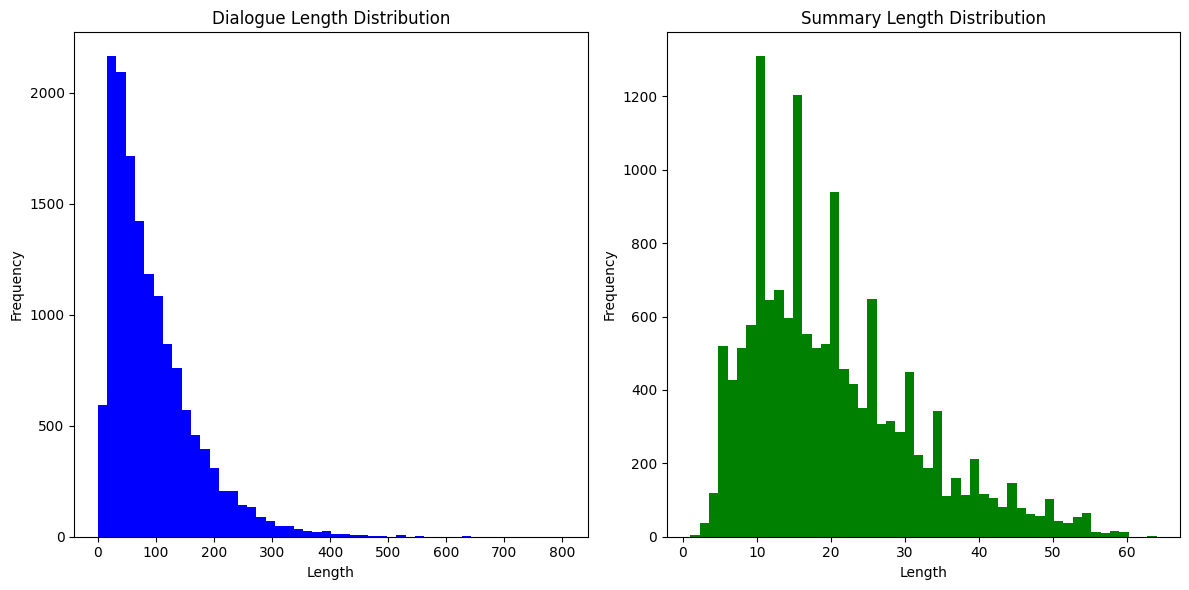

In [43]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dialogue_lengths, bins=50, color='b')
plt.title('Dialogue Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(summary_lengths, bins=50, color='g')
plt.title('Summary Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Inference with Pre-trained Models

In [44]:
from transformers import pipeline
import random

# Select a few random dialogues from the training set
random.seed(42)

random_indices = random.sample(range(len(dataset["train"])), 5)
random_dialogues = [dataset["train"][i]["dialogue"] for i in random_indices]


In [45]:
random_indices

[10476, 1824, 409, 12149, 4506]

In [46]:
random_dialogues

["Maria: We've passed the security and we're waiting for the boarding\r\nAldona: no problems?\r\nPhilip: not at all, was smooth\r\nAldona: I told you\r\nMaria: I know, but I am traumatised after the stopped me the last time\r\nMaria: it was so stressful and horrible, quite humiliating\r\nAldona: I know, but it should not happen again\r\nPhilip: She is panicking all the time\r\nPhilip: it would be even funny, if it wasn't so annoying\r\nMaria: I'm sorry, it's kind of a phobia I guess\r\nAldona: no, it will pass, you just had very bad experiences\r\nMaria: maybe you're right\r\nMaria: I feel already better, thanks guys for your support\r\nAldona: 👍",
 "Filly: wanna go to a concert?\r\nBonnie: whose?\r\nFilly: Mumford and Sons\r\nBonnie: who r they?\r\nFilly: u don't know them?\r\nFilly: they r great!\r\nFilly: listen\r\nFilly: <file_video>\r\nBonnie: ok, they r good\r\nFilly: so will u come?\r\nBonnie: when?\r\nFilly: next sat\r\nBonnie: ok :)\r\nFilly: great :D",
 'Wayne: Man, have you 

In [47]:
summarization_pipeline = pipeline('summarization', model='facebook/bart-large-cnn')

summarization_pipeline(random_dialogues)

Your max_length is set to 142, but your input_length is only 121. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)
Your max_length is set to 142, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 142, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


[{'summary_text': 'Maria was stopped by security at the airport last time. She was traumatised by the experience. She is now suffering from a phobia of the airport. She says she feels better now she is back at home with her family. She hopes that her phobia will soon pass.'},
 {'summary_text': "Filly: wanna go to a concert? Filly: whose? Mumford and Sons. Filly says they're 'great' Filly asks if she can come to the concert. She says she'll come when she's next sat at the pub. She asks her friends if they want to come too."},
 {'summary_text': 'Wayne: Man, have you seen the reviews? Joe: Yeah, looks like the movie sucks. Wayne: Yeah... dammit :(. Joe: "It\'s going to be great" Wayne: "Yeah, I\'m sure it will be." "It will be great," Joe says. "It\'ll be great."'},
 {'summary_text': 'Sylvia is not in the right mood to go to the pub. Tsar asks if she would rather sit at home. Sylvia says she would like to stay at home and call him if she needs him. She says she will call him anytime if he

In [48]:
summarization_pipeline = pipeline('summarization', model='t5-large')

summarization_pipeline(random_dialogues)

C:\Users\Pat\miniconda3\Lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
Your max_length is set to 200, but your input_length is only 169. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_l

[{'summary_text': "aldona says she's traumatised after the stopped her the last time . he says it should not happen again . but she says it's a phobia and it will pass ."},
 {'summary_text': "mumford and sons are filly's favourite band . filly: u don't know them? Bonnie: they r great! ... so will u come?"},
 {'summary_text': 'Wayne: man, have you seen the reviews? looks like the movie sucks . Joe: yeah... dammit :('},
 {'summary_text': 'Tsar: are you coming to the pub with us tonight? Sylvia: no, not in the mood for the pub :( .'},
 {'summary_text': 'Watson: Bella, please tell me some interviewing skills.. Watson: yeah i have one tomorrow. Bella: its no big deal. meet me at 4 pm Watson: Yeah sure.'}]

In [49]:
summarization_pipeline = pipeline("summarization", model="facebook/bart-large-xsum")

summarization_pipeline(random_dialogues)

Your max_length is set to 62, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[{'summary_text': 'Aldona and Philip are on their way to Heathrow Airport in the UK.'},
 {'summary_text': 'This is the conversation that started out as a question, but turned into a conversation about Mumford and Sons.'},
 {'summary_text': 'Joe and Wayne were talking on the phone about the new Batman movie.'},
 {'summary_text': 'An exchange between a woman and a man in the Czech Republic has gone viral on social media.'},
 {'summary_text': 'A few weeks ago, I was talking to my friend Bella on the phone.'}]

In [50]:
random_dialogues

["Maria: We've passed the security and we're waiting for the boarding\r\nAldona: no problems?\r\nPhilip: not at all, was smooth\r\nAldona: I told you\r\nMaria: I know, but I am traumatised after the stopped me the last time\r\nMaria: it was so stressful and horrible, quite humiliating\r\nAldona: I know, but it should not happen again\r\nPhilip: She is panicking all the time\r\nPhilip: it would be even funny, if it wasn't so annoying\r\nMaria: I'm sorry, it's kind of a phobia I guess\r\nAldona: no, it will pass, you just had very bad experiences\r\nMaria: maybe you're right\r\nMaria: I feel already better, thanks guys for your support\r\nAldona: 👍",
 "Filly: wanna go to a concert?\r\nBonnie: whose?\r\nFilly: Mumford and Sons\r\nBonnie: who r they?\r\nFilly: u don't know them?\r\nFilly: they r great!\r\nFilly: listen\r\nFilly: <file_video>\r\nBonnie: ok, they r good\r\nFilly: so will u come?\r\nBonnie: when?\r\nFilly: next sat\r\nBonnie: ok :)\r\nFilly: great :D",
 'Wayne: Man, have you 

Only few of them are coherent. However, since the `max_length` parameter isn't specified, the summarizations for short dialogues tend to merely repeat the text, with some even introducing details that were not originally present. Several summaries are formatted as paragraphs, which is a standard approach to summarization. Yet, some remain structured as dialogues.
"facebook/bart-large-xsum" works better than other two models, but there still a lot of essential points weren't cought.

# Fine-tuning

In [22]:
import transformers
from datasets import load_dataset, load_metric, load_from_disk
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
data = load_dataset('samsum')
metric = load_metric('rouge')
model_checkpoints = 'facebook/bart-large-xsum'

C:\Users\Pat\AppData\Local\Temp\ipykernel_3908\1059966745.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('rouge')
C:\Users\Pat\miniconda3\Lib\site-packages\datasets\load.py:753: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.17.0/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [24]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [25]:
max_input = 512
max_target = 128
tokenizer = transformers.AutoTokenizer.from_pretrained(model_checkpoints)

In [26]:
def preprocess_data(data_to_process):
  #get the dialogue text
  inputs = [dialogue for dialogue in data_to_process['dialogue']]
  #tokenize text
  model_inputs = tokenizer(inputs,  max_length=max_input, padding='max_length', truncation=True)

  #tokenize labels
  with tokenizer.as_target_tokenizer():
    targets = tokenizer(data_to_process['summary'], max_length=max_target, padding='max_length', truncation=True)
    
  model_inputs['labels'] = targets['input_ids']
  #reuturns input_ids, attention_masks, labels
  return model_inputs

In [27]:
tokenize_data = data.map(preprocess_data, batched = True, remove_columns=['id', 'dialogue', 'summary'])

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

C:\Users\Pat\miniconda3\Lib\site-packages\transformers\tokenization_utils_base.py:3866: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [28]:
#sample the data
train_sample = tokenize_data['train'].shuffle(seed=123).select(range(1000))
validation_sample = tokenize_data['validation'].shuffle(seed=123).select(range(500))
test_sample = tokenize_data['test'].shuffle(seed=123).select(range(200))

In [29]:
tokenize_data['train'] = train_sample
tokenize_data['validation'] = validation_sample
tokenize_data['test'] = test_sample

In [30]:
tokenize_data

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 200
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 500
    })
})

In [31]:
#load model
model = transformers.AutoModelForSeq2SeqLM.from_pretrained(model_checkpoints)

In [32]:
batch_size = 1

In [33]:
#collator to create batches. It preprocess data with the given tokenizer
collator = transformers.DataCollatorForSeq2Seq(tokenizer, model=model)

In [34]:
# compute rouge for evaluation 

def compute_rouge(pred):
  predictions, labels = pred
  #decode the predictions
  decode_predictions = tokenizer.batch_decode(predictions, skip_special_tokens=True)
  #decode labels
  decode_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

  #compute results
  res = metric.compute(predictions=decode_predictions, references=decode_labels, use_stemmer=True)
  #get %
  res = {key: value.mid.fmeasure * 100 for key, value in res.items()}

  pred_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
  res['gen_len'] = np.mean(pred_lens)

  return {k: round(v, 4) for k, v in res.items()}

In [35]:
args = transformers.Seq2SeqTrainingArguments(
    'conversation-summ',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size= 1,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=3,
    predict_with_generate=True,
    eval_accumulation_steps=1,
    fp16=True
    )
#only CUDA available -> fp16=True

In [36]:
trainer = transformers.Seq2SeqTrainer(
    model, 
    args,
    train_dataset=tokenize_data['train'],
    eval_dataset=tokenize_data['validation'],
    data_collator=collator,
    tokenizer=tokenizer,
    compute_metrics=compute_rouge
)

In [38]:
trainer.train()

C:\Users\Pat\miniconda3\Lib\site-packages\transformers\models\bart\modeling_bart.py:590: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,0.572600,0.360669,48.730200,24.377500,39.501300,39.541800,23.618000
2,0.215800,0.371608,51.735000,26.017900,41.192300,41.193200,30.082000
3,0.132500,0.421392,51.886400,26.175100,41.215800,41.250900,29.316000


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a G

TrainOutput(global_step=1500, training_loss=0.30696264139811197, metrics={'train_runtime': 799.1874, 'train_samples_per_second': 3.754, 'train_steps_per_second': 1.877, 'total_flos': 3250656903168000.0, 'train_loss': 0.30696264139811197, 'epoch': 3.0})

# Test the fine tuned model

In [59]:
random_dialogues[0]

"Maria: We've passed the security and we're waiting for the boarding\r\nAldona: no problems?\r\nPhilip: not at all, was smooth\r\nAldona: I told you\r\nMaria: I know, but I am traumatised after the stopped me the last time\r\nMaria: it was so stressful and horrible, quite humiliating\r\nAldona: I know, but it should not happen again\r\nPhilip: She is panicking all the time\r\nPhilip: it would be even funny, if it wasn't so annoying\r\nMaria: I'm sorry, it's kind of a phobia I guess\r\nAldona: no, it will pass, you just had very bad experiences\r\nMaria: maybe you're right\r\nMaria: I feel already better, thanks guys for your support\r\nAldona: 👍"

In [54]:
model_inputs = tokenizer(random_dialogues[0],  max_length=max_input, padding='max_length', truncation=True)

In [55]:
model_inputs

{'input_ids': [0, 38517, 35, 166, 348, 1595, 5, 573, 8, 52, 214, 2445, 13, 5, 16011, 50121, 50118, 250, 4779, 4488, 35, 117, 1272, 116, 50121, 50118, 25531, 1588, 35, 45, 23, 70, 6, 21, 6921, 50121, 50118, 250, 4779, 4488, 35, 38, 174, 47, 50121, 50118, 38517, 35, 38, 216, 6, 53, 38, 524, 25178, 1720, 71, 5, 2294, 162, 5, 94, 86, 50121, 50118, 38517, 35, 24, 21, 98, 17322, 8, 11385, 6, 1341, 27750, 50121, 50118, 250, 4779, 4488, 35, 38, 216, 6, 53, 24, 197, 45, 1369, 456, 50121, 50118, 25531, 1588, 35, 264, 16, 5730, 10176, 70, 5, 86, 50121, 50118, 25531, 1588, 35, 24, 74, 28, 190, 6269, 6, 114, 24, 938, 75, 98, 19887, 50121, 50118, 38517, 35, 38, 437, 6661, 6, 24, 18, 761, 9, 10, 7843, 33693, 38, 4443, 50121, 50118, 250, 4779, 4488, 35, 117, 6, 24, 40, 1323, 6, 47, 95, 56, 182, 1099, 3734, 50121, 50118, 38517, 35, 2085, 47, 214, 235, 50121, 50118, 38517, 35, 38, 619, 416, 357, 6, 2446, 1669, 13, 110, 323, 50121, 50118, 250, 4779, 4488, 35, 26964, 8384, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [56]:
raw_pred, _, _ = trainer.predict([model_inputs])

In [57]:
tokenizer.decode(raw_pred[0])

'</s><s>Maria is traumatised after the security stopped her the last time. She is panicking now. </s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [58]:
tokenizer.decode(raw_pred[0])

'</s><s>Maria is traumatised after the security stopped her the last time. She is panicking now. </s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

The summarization now looks much better, it is more coherent and fluency.